In [1]:
# Add the libraies path to python
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..\\python\\database'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\plots'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\charts'))

# Library imports
import database
import roster_plots
import roster_charts
import performance_plots
import score_plots
import draft_charts

In [2]:
# Constants to use in this notebook
season = "2025"
show_charts = True
show_plots = True
# Build the database for the season
db = database.database(season)

2025 Race to the bottom
GW: 0 , Ranks: ['rafa', 'zac', 'aj', 'matt', 'sean', 'vu', 'tj', 'morfin', 'katabe', 'ben']
GW: 1 , Ranks: ['zac', 'rafa', 'aj', 'morfin', 'sean', 'matt', 'ben', 'katabe', 'vu', 'tj']
GW: 2 , Ranks: ['rafa', 'zac', 'aj', 'sean', 'morfin', 'matt', 'ben', 'katabe', 'tj', 'vu']
GW: 3 , Ranks: ['zac', 'rafa', 'aj', 'sean', 'morfin', 'matt', 'katabe', 'ben', 'tj', 'vu']
GW: 4 , Ranks: ['rafa', 'zac', 'aj', 'sean', 'morfin', 'tj', 'ben', 'katabe', 'matt', 'vu']
GW: 5 , Ranks: ['zac', 'rafa', 'aj', 'sean', 'morfin', 'ben', 'katabe', 'tj', 'vu', 'matt']
GW: 6 , Ranks: ['zac', 'rafa', 'sean', 'morfin', 'ben', 'aj', 'vu', 'katabe', 'tj', 'matt']
GW: 7 , Ranks: ['zac', 'rafa', 'aj', 'sean', 'morfin', 'ben', 'vu', 'tj', 'katabe', 'matt']
GW: 8 , Ranks: ['zac', 'rafa', 'sean', 'ben', 'aj', 'morfin', 'vu', 'tj', 'katabe', 'matt']


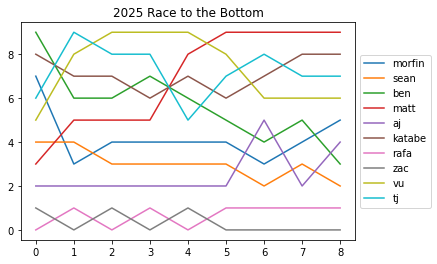

In [5]:
print(db.get_season(), "Race to the bottom")
# Plot the manager activity for the season

import pandas as pd
import matplotlib.pyplot as plt

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()

manager_rank_scores = dict()
manager_ranks_over_time = dict()

for name in managers:
    manager_ranks_over_time[name] = list()
    manager_rank_scores[name] = list()
    manager_scores = db.get_manager_gw_scores(name)
    
    for gw in range(number_of_gws):
        if(gw == 0):
            rank_score = 0
        else:
            rank_score = manager_rank_scores[name][gw - 1]
        manager_score = db.get_gw_score(name, gw)
        opponent_score = db.get_opponent_score(name, gw)
        
        # Calculate the result score
        result_score = 30000 if manager_score > opponent_score else 10000 if manager_score == opponent_score else 0
        rank_score += result_score + manager_score
        manager_rank_scores[name].append(rank_score)
    
for gw in range(number_of_gws):
    manager_rank_scores_for_gw = dict()
    
    for name in managers:
        manager_rank_scores_for_gw[name] = manager_rank_scores[name][gw]
        
    manager_ranks_for_gw = sorted(manager_rank_scores_for_gw.items(), key=lambda item: item[1])
    manager_ranks = list()
    for sorted_managers in manager_ranks_for_gw:
        name = sorted_managers[0]
        manager_ranks.append(name)
    print("GW:", gw, ", Ranks:", manager_ranks)
    
    for name in managers:
        manager_ranks_over_time[name].append(manager_ranks.index(name))

df = pd.DataFrame(data=manager_ranks_over_time)
df.head()    
df.plot(title = db.get_season() + ' Race to the Bottom')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))